# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Aayush Kumar Verma

## UNI: av2955

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from xgboost import XGBClassifier

In [4]:
players_df = pd.read_csv('tb_lobby_stats_player.csv')
print (players_df)

        idLobbyGame  idPlayer  ...  flWinner          dtCreatedAt
0                 1         1  ...         0  2022-01-21 19:45:44
1                 2         1  ...         1  2022-02-04 02:09:47
2                 3         2  ...         0  2021-09-18 18:07:43
3                 3       391  ...         1  2021-09-18 18:07:43
4                 4         2  ...         0  2021-09-27 00:17:45
...             ...       ...  ...       ...                  ...
184147       172907      2716  ...         1  2021-11-27 16:47:57
184148       172908      2716  ...         1  2021-12-10 01:08:48
184149       172909      2716  ...         0  2022-01-09 21:01:10
184150       172910      2716  ...         0  2022-01-14 17:42:37
184151       172911      2716  ...         1  2022-01-18 02:39:01

[184152 rows x 38 columns]


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

In [5]:
players_df.replace ('[\?]', np.nan, regex=True, inplace=True)
result = 100 - (players_df.count() * 100 / len(players_df))
print ('Percentage of Missing Values = ', result)
print ('Result shape = ', result.shape)

Percentage of Missing Values =  idLobbyGame       0.000000
idPlayer          0.000000
idRoom            0.000000
qtKill            0.000000
qtAssist          0.000000
qtDeath           0.000000
qtHs              0.000000
qtBombeDefuse     0.000000
qtBombePlant      0.000000
qtTk              0.065164
qtTkAssist        0.065164
qt1Kill           0.000000
qt2Kill           0.000000
qt3Kill           0.000000
qt4Kill           0.000000
qt5Kill           0.000000
qtPlusKill        0.000000
qtFirstKill       0.000000
vlDamage          0.000000
qtHits            0.065164
qtShots           0.000000
qtLastAlive       0.065164
qtClutchWon       0.000000
qtRoundsPlayed    0.000000
descMapName       0.000000
vlLevel           0.000000
qtSurvived        0.382836
qtTrade           0.382836
qtFlashAssist     0.382836
qtHitHeadshot     0.382836
qtHitChest        0.382836
qtHitStomach      0.382836
qtHitLeftAtm      0.382836
qtHitRightArm     0.382836
qtHitLeftLeg      0.382836
qtHitRightLeg     0.382

Text(0, 0.5, 'Percentage')

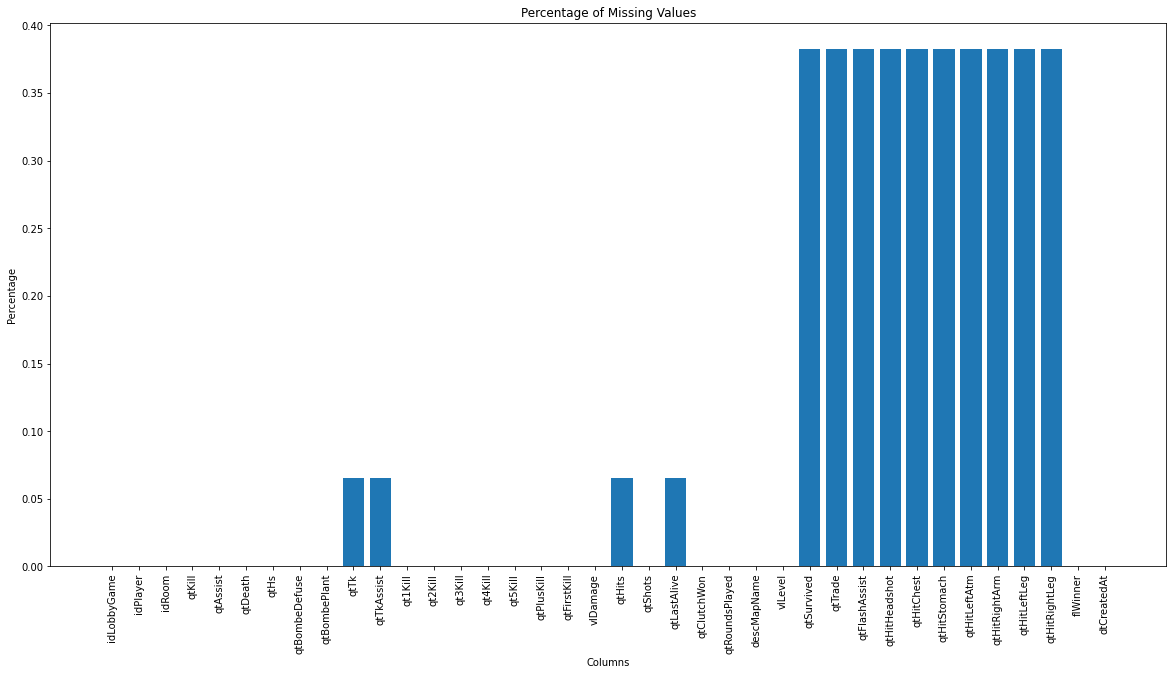

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(players_df.columns,result)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Percentage of Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')

There are the first 3 ID columns containing categorical values. I will drop these columns so as to make our model independent of these values.

Apart from the above 3, I will not drop any columns. A decision tree handles missing values effectively and therefore I will not drop those rows with missing values. However, for the ease of computation, I will replace the missing values with 0 in the numerical features. In the end, when the model is trained, we can get the most important features based on the Learned Decision Tree.



In [7]:
df = players_df.drop(['dtCreatedAt'], axis=1)
df

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
0,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0
1,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1
2,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0
3,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1
4,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,0.0,8,5,1,0,0,0,3,2610,88.0,524,1.0,0,26,de_vertigo,9,11.0,0.0,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1
184148,172908,2716,178497,15,1,22,5,0,1,0.0,0.0,11,2,0,0,0,0,5,2154,63.0,357,0.0,0,29,de_nuke,9,7.0,5.0,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1
184149,172909,2716,178498,9,6,23,2,0,3,0.0,0.0,9,0,0,0,0,0,2,1701,59.0,371,0.0,0,27,de_vertigo,9,4.0,2.0,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0
184150,172910,2716,178499,15,5,20,6,0,2,0.0,0.0,13,1,0,0,0,0,1,2246,65.0,355,0.0,0,25,de_dust2,9,5.0,3.0,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0


**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

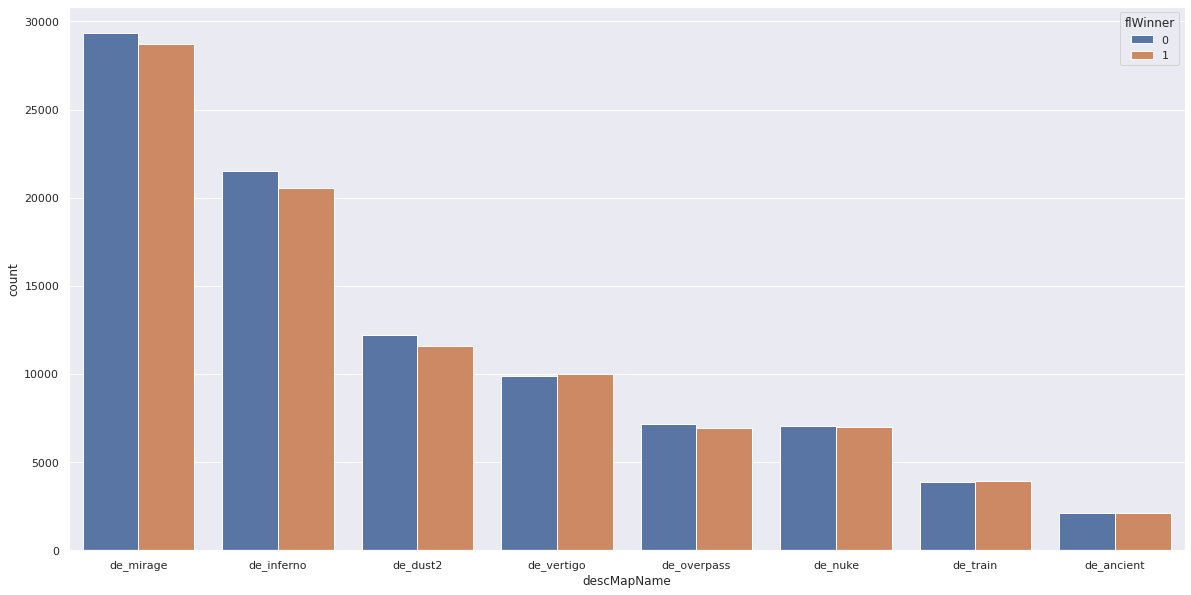

In [8]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.countplot(x='descMapName', data=players_df, order=players_df['descMapName'].value_counts().index, hue='flWinner')

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [9]:
players_X = df.drop(['flWinner'], axis=1)
players_Y = df['flWinner']

players_x_dev, players_x_test, players_y_dev, players_y_test = train_test_split(players_X, players_Y, test_size=0.2, random_state=0)
print(players_x_dev[:5], '\n\n', players_y_test[:5])

        idLobbyGame  idPlayer  ...  qtHitLeftLeg  qtHitRightLeg
90486         82309      1900  ...           3.0            0.0
101668        92931      2465  ...           2.0            4.0
86265         78352      1221  ...           6.0            2.0
87566         79560      1241  ...           2.0            2.0
1410           1276        19  ...           2.0            0.0

[5 rows x 36 columns] 

 13311     0
159888    0
116845    0
34033     1
2708      1
Name: flWinner, dtype: int64


I split the data into a 4:1 ratio. This is done with Random Splitting as the dataset is fairly balanced as seen from the above plot and we do not want to induce bias also.

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [10]:
# print (players_x_dev.isnull().sum())

players_x_dev['qtTk'] = players_x_dev['qtTk'].fillna(0)
players_x_dev['qtTkAssist'] = players_x_dev['qtTkAssist'].fillna(0)
players_x_dev['qtHits'] = players_x_dev['qtHits'].fillna(0)
players_x_dev['qtLastAlive'] = players_x_dev['qtLastAlive'].fillna(0)
players_x_dev['qtSurvived'] = players_x_dev['qtSurvived'].fillna(0)
players_x_dev['qtSurvived'] = players_x_dev['qtSurvived'].fillna(0)
players_x_dev['qtTrade'] = players_x_dev['qtTrade'].fillna(0)
players_x_dev['qtFlashAssist'] = players_x_dev['qtFlashAssist'].fillna(0)
players_x_dev['qtHitHeadshot'] = players_x_dev['qtHitHeadshot'].fillna(0)
players_x_dev['qtHitChest'] = players_x_dev['qtHitChest'].fillna(0)
players_x_dev['qtHitStomach'] = players_x_dev['qtHitStomach'].fillna(0)
players_x_dev['qtHitLeftAtm'] = players_x_dev['qtHitLeftAtm'].fillna(0)
players_x_dev['qtHitRightArm'] = players_x_dev['qtHitRightArm'].fillna(0)
players_x_dev['qtHitLeftLeg'] = players_x_dev['qtHitLeftLeg'].fillna(0)
players_x_dev['qtHitRightLeg'] = players_x_dev['qtHitRightLeg'].fillna(0)

players_x_test['qtTk'] = players_x_test['qtTk'].fillna(0)
players_x_test['qtTkAssist'] = players_x_test['qtTkAssist'].fillna(0)
players_x_test['qtHits'] = players_x_test['qtHits'].fillna(0)
players_x_test['qtLastAlive'] = players_x_test['qtLastAlive'].fillna(0)
players_x_test['qtSurvived'] = players_x_test['qtSurvived'].fillna(0)
players_x_test['qtSurvived'] = players_x_test['qtSurvived'].fillna(0)
players_x_test['qtTrade'] = players_x_test['qtTrade'].fillna(0)
players_x_test['qtFlashAssist'] = players_x_test['qtFlashAssist'].fillna(0)
players_x_test['qtHitHeadshot'] = players_x_test['qtHitHeadshot'].fillna(0)
players_x_test['qtHitChest'] = players_x_test['qtHitChest'].fillna(0)
players_x_test['qtHitStomach'] = players_x_test['qtHitStomach'].fillna(0)
players_x_test['qtHitLeftAtm'] = players_x_test['qtHitLeftAtm'].fillna(0)
players_x_test['qtHitRightArm'] = players_x_test['qtHitRightArm'].fillna(0)
players_x_test['qtHitLeftLeg'] = players_x_test['qtHitLeftLeg'].fillna(0)
players_x_test['qtHitRightLeg'] = players_x_test['qtHitRightLeg'].fillna(0)

players_x_dev = players_x_dev.drop(['idLobbyGame', 'idPlayer', 'idRoom'], axis=1)
players_x_test = players_x_test.drop(['idLobbyGame', 'idPlayer', 'idRoom'], axis=1)

# print (players_x_dev.isnull().sum())

cat_features = ['descMapName']
num_features = ['qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed', 'vlLevel', 'qtSurvived', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg']

preprocess = make_column_transformer((StandardScaler(), num_features), (OneHotEncoder(handle_unknown="ignore"), cat_features), remainder="passthrough")



Yes, scaling is required because there may be some values ranging from, say, 0 to 1, and some values ranging from, say, 0 to 100, and 'flWinner' ranges from 0 to 1. Hence, scaling all values to a common scale is required.

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
pipe = make_pipeline(preprocess, dt_classifier)
pipe.fit(players_x_dev, players_y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['qtKill', 'qtAssist',
                                                   'qtDeath', 'qtHs',
                                                   'qtBombeDefuse',
                                                   'qtBombePlant', 'qtTk',
                                                   'qtTkAssist', 'qt1Kill',
                                                   'qt2Kill', 'qt3Kill',
                                                   'qt4Kill', 'qt5Kill',
                                                   'qtPlusKill', 'qtFirstKill',
                                                   'vlDamage', 'qtHits',
                                                   'qtShots', 'qtLastAlive',
                            

In [12]:
print("Performance on Development Data = ", pipe.score(players_x_dev, players_y_dev))
print("Performance on Test Data = ", pipe.score(players_x_test, players_y_test))
print("Prediction Prob. = \n", pipe.predict_proba(players_x_dev))

'''

Printing prediction probability as another metric of importance because by looking at the probabilities,
we can know how confident is the model about it's prediction.

'''

Performance on Development Data =  1.0
Performance on Test Data =  0.7325893948032907
Prediction Prob. = 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


"\n\nPrinting prediction probability as another metric of importance because by looking at the probabilities,\nwe can know how confident is the model about it's prediction.\n\n"

**1.7: Visualize the trained tree until the max_depth 8**

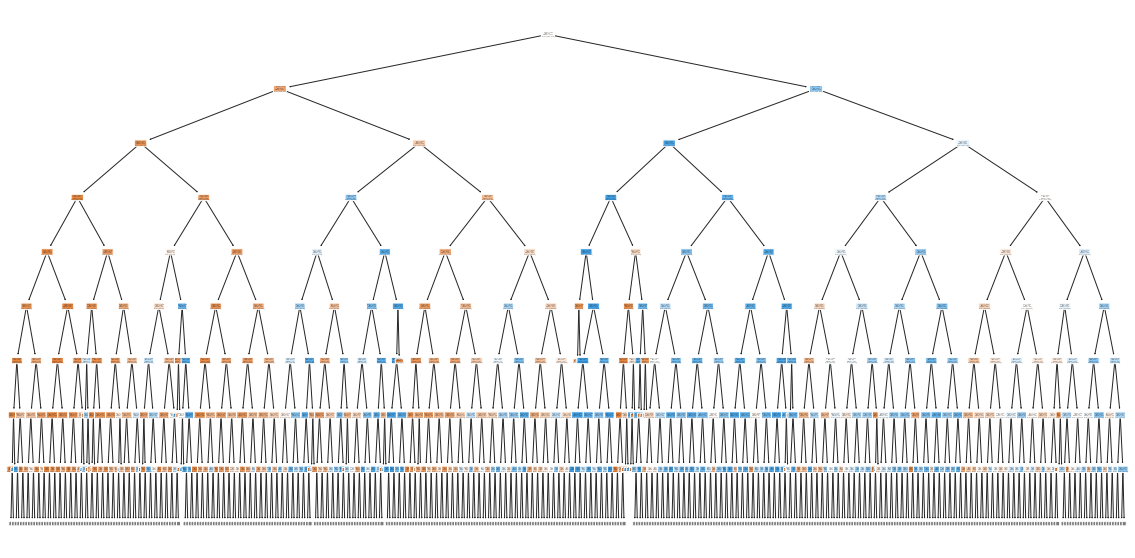

In [18]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plot_tree(dt_classifier, filled = True, rounded = True, max_depth=8)
plt.show()

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [ ]:
print(players_x_dev.shape)

(147321, 33)


In [ ]:
# With Cost Complexity

dt_classifier_cc = DecisionTreeClassifier(ccp_alpha=0.003)
pipe = make_pipeline(preprocess, dt_classifier_cc)
pipe.fit(players_x_dev, players_y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['qtKill', 'qtAssist',
                                                   'qtDeath', 'qtHs',
                                                   'qtBombeDefuse',
                                                   'qtBombePlant', 'qtTk',
                                                   'qtTkAssist', 'qt1Kill',
                                                   'qt2Kill', 'qt3Kill',
                                                   'qt4Kill', 'qt5Kill',
                                                   'qtPlusKill', 'qtFirstKill',
                                                   'vlDamage', 'qtHits',
                                                   'qtShots', 'qtLastAlive',
                            

In [ ]:
print(players_x_test.shape)

(36831, 33)


In [ ]:
print("Performance on Development Data = ", pipe.score(players_x_dev, players_y_dev))
print("Performance on Test Data = ", pipe.score(players_x_test, players_y_test))

Performance on Development Data =  0.7530426755180863
Performance on Test Data =  0.7549347017458119


Performance increased from 0.73 to 0.75 on the test data.

**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


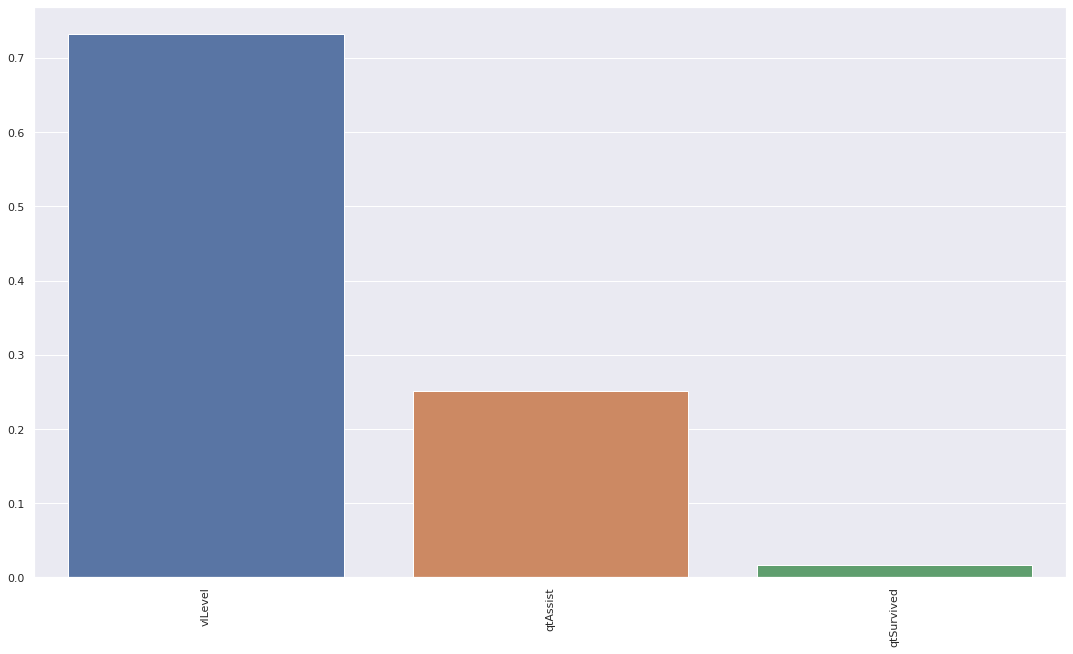

In [ ]:
plt.figure(figsize=(18.5,10.5))
feature_names = cat_features + num_features
feat_imps = zip(feature_names, dt_classifier_cc.feature_importances_ )
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x:x[1], reverse=True)))      
ax=sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

'vlLevel', 'qtAssist', and 'qtSurvived' are the most important features because they appear as the top 3 features with the highest importance as classified by the Decision Tree Classifier in the above plot.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
pipe_rf = make_pipeline(preprocess, rf_classifier)
pipe_rf.fit(players_x_dev, players_y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['qtKill', 'qtAssist',
                                                   'qtDeath', 'qtHs',
                                                   'qtBombeDefuse',
                                                   'qtBombePlant', 'qtTk',
                                                   'qtTkAssist', 'qt1Kill',
                                                   'qt2Kill', 'qt3Kill',
                                                   'qt4Kill', 'qt5Kill',
                                                   'qtPlusKill', 'qtFirstKill',
                                                   'vlDamage', 'qtHits',
                                                   'qtShots', 'qtLastAlive',
                            

In [ ]:
print ("Performance on Test data = ", pipe_rf.score (players_x_test, players_y_test))

Performance on Test data =  0.7919144199180038


Performance of a Random Forest Classifier increased to 0.79 as compared to 0.75 of a Decision Tree.

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [ ]:
# For Random Forests, the measure of impurity is Gini index by default.
# It is not necessary that a trained Random Forest model will always have pure leaves.
# If we simply print out the impurity values, we may notice that all leaves may not be pure.

for tree in rf_classifier.estimators_:
  print (tree.tree_.impurity)

[0.4998208  0.41598896 0.38174729 ... 0.         0.         0.        ]
[0.49991105 0.43868958 0.40530693 ... 0.5        0.         0.        ]
[0.49992175 0.49521446 0.36046541 ... 0.48       0.         0.        ]
[0.49992839 0.44309023 0.37052274 ... 0.48       0.         0.        ]
[0.4999567  0.47355015 0.40433438 ... 0.         0.         0.        ]
[0.49997228 0.41769272 0.26437799 ... 0.06887755 0.         0.        ]
[0.49993113 0.48886035 0.44112964 ... 0.         0.         0.        ]
[0.49985956 0.33459108 0.28565276 ... 0.15277778 0.         0.        ]
[0.49992527 0.43931873 0.45192983 ... 0.         0.         0.        ]
[0.49990904 0.30465589 0.45360473 ... 0.         0.         0.        ]
[0.49993287 0.30711856 0.48537449 ... 0.         0.         0.        ]
[0.49996267 0.49225052 0.42335418 ... 0.         0.         0.        ]
[0.49992758 0.4884349  0.46728866 ... 0.         0.         0.        ]
[0.49991935 0.3344569  0.23492904 ... 0.         0.         0.  

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [ ]:
'''

1. Number of trees: This will help us choose the optimum number of trees. In Random forest, more the number of trees better
accuracy. But, beyond a certain number of trees the increase in accuracy is not much and it's always better to have
simpler model complexity. Hence, searching over optimal number of trees is important.

2. Maximum Number of Features: Choosing less number of features may cause underfitting and choosing a large number of features
may cause overfitting, therefore, we want to find an optimal number of features.


'''

"\n\n1. Number of trees: This will help us choose the optimum number of trees. In Random forest, more the number of trees better\naccuracy. But, beyond a certain number of trees the increase in accuracy is not much and it's always better to have\nsimpler model complexity. Hence, searching over optimal number of trees is important.\n\n2. Maximum Leaf Nodes: This will help us choose the individual trees such that they are not overfit. It gives tree which is not\nvery wide and by limiting the number of leafs we are limiting number of regions in the space in which the tree makes decissions\n\n\n"

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [ ]:
# One way to go about is to get the parameters from the tree in which tuning is not yet performed and keep that as the upper limit and do a grid search.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [ ]:
from sklearn.model_selection import cross_val_score

# Total 33 features are there so we are equally distributing the values in intervals of 7.
max_features = [7, 14, 21, 28, 33]

best_cv_score = 0.0
best_hyp = None
for feature in max_features:
  # Defining a range of values with equal distribution from a low to high value.
  estimators = [25, 50, 75, 100, 150, 200]
  
  plt.clf()
  for estimator in estimators:
    rf_tuning = make_pipeline(preprocess, RandomForestClassifier (n_estimators = estimator, max_features = feature, random_state = 100, oob_score=True, warm_start=True))
    cv_score = cross_val_score(rf_tuning, players_x_dev, players_y_dev, cv=2)
    cv_score = cv_score.mean()
    if cv_score > best_cv_score:
      best_hyp = (feature, estimator)
      best_cv_score = cv_score
    
print("Best Cross Validation Score = ", best_cv_score)
print("Best Hyperparameter (# features, # trees) = ", best_hyp)
  
# TODO: 
# train rf_tuning with best params
# rf_tuning_best = make_pipeline(preprocess, RandomForestClassifier (n_estimators = best_hp[1], max_features = best_hp[0], random_state = 100, oob_score=True, warm_start=True))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

Best Cross Validation Score =  0.7930709146869492
Best Hyperparameter (# features, # trees) =  (14, 200)


<Figure size 1440x720 with 0 Axes>

In [ ]:
rf_tuning_best = make_pipeline(preprocess, RandomForestClassifier (n_estimators = 200, max_features = 14, random_state = 100, oob_score=True, warm_start=True))
rf_tuning_best.fit(players_x_dev, players_y_dev)
print('Performance score on test set with best hyperparameters = ', rf_tuning_best.score(players_x_test, players_y_test))

Performance score on test set with best hyperparameters =  0.798783633352339


Yes, the performance has increased as compared to the Vanilla Random Forest from 0.7919 to 0.7987, however this change is very small.

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


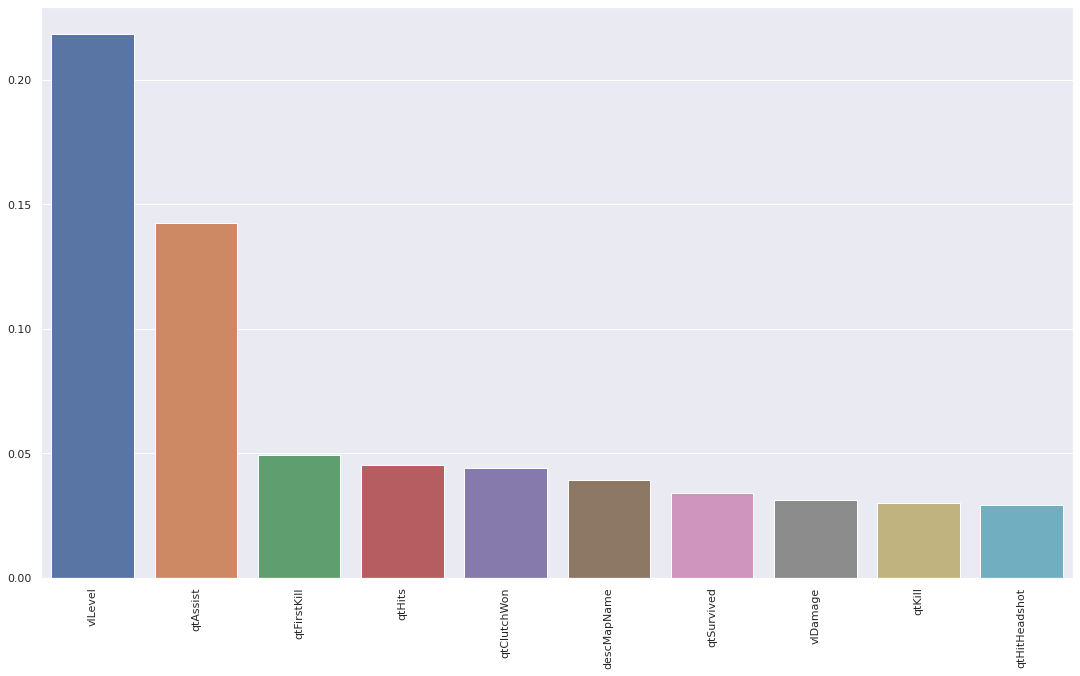

In [ ]:
best_rf_features = rf_tuning_best.named_steps['randomforestclassifier']
plt.figure(figsize=(18.5,10.5))
feature_names = cat_features+ num_features
feat_imps = zip(feature_names, best_rf_features.feature_importances_ )
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x:x[1], reverse=True)))      
ax=sns.barplot(list(feats[:10]), list(imps[:10]))
ax.tick_params(axis='x', rotation=90)

From decision trees, the top 3 features we got were: (vlLevel, qtAssist, qtSurvived)

From random forest classifier, the top 3 features, we got are: (vlLevel, qtAssist, qtFirstKill)

The difference is between the features - qtSurvived and qtFirstKill. The importance of qtFirstKill (0.05) in from random forest classifier is greater than the importance of qtSurvived (<< 0.05) from decision tree classifier.

Hence, using the features from the random forest classifier (vlLevel, qtAssist, qtSurvived) makes more sense. Also, another reason is that RandomForest showed an increase in performance as compared to a DecisionTree, so it makes sense to use the top-3 features listed by it.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Hyperparameters chosen are Number of Trees, Maximum Number of features, and Max Depth of Tree. 

In [ ]:
'''

Choosing n_estimators, max_features, and max_depth because these 3 determine the 
complexity of the model and varying the values of these parameters will increase
or decrease the complexity of the model to avoid overfitting and underfitting.

'''

params = {"n_estimators": [100, 200], "max_features": [21, 33], "max_depth": [7, 10]}
start = time.time()
grid = GridSearchCV(GradientBoostingClassifier(random_state=100, warm_start=True), param_grid=params, cv=5)
gb_tuning = make_pipeline(preprocess, grid)
gb_tuning.fit(players_x_dev, players_y_dev)
end = time.time()

print('Total time (GradientBoostingClassifier) = ', (end - start))
print('Best Hyperparameter values = ', grid.best_params_)

Total time (GradientBoostingClassifier) =  4550.490154266357
Best Hyperparameter values =  {'max_depth': 7, 'max_features': 33, 'n_estimators': 100}


In [ ]:
gb_tuning_best = make_pipeline(preprocess, GradientBoostingClassifier(random_state=100, max_depth=7, max_features=33, n_estimators=100, warm_start=True))
gb_tuning_best.fit(players_x_dev, players_y_dev)
print('Performance on Test data = ', gb_tuning_best.score(players_x_test, players_y_test))

Performance on Test data =  0.8019060030952188


Performance with a Gradient Boosting tree increased to 0.80 from 0.79 as compared to that of a Random forest classifier.

In [ ]:
'''

Choosing max_iter and max_depth because these 2 determine the 
complexity of the model and varying the values of these parameters will increase
or decrease the complexity of the model to avoid overfitting and underfitting.

Because we don't know the loss landscape, if we start from a very low or very high 
learning rate, the model may converge to a sub-optimal minima, therefore we want our
learning rate to be "just right" so that it converges to an optimal minima.

'''

params = {"max_iter": [50, 100], "learning_rate": np.linspace(0.2, 5), "max_iter": [7, 10]}
start = time.time()
grid = GridSearchCV(HistGradientBoostingClassifier(random_state=100, warm_start=True), param_grid=params, cv=5)
hgb_tuning = make_pipeline(preprocess, grid)
hgb_tuning.fit(players_x_dev, players_y_dev)
end = time.time()

print('Total time (HistGradientBoostingClassifier) = ', (end - start))
print('Best Hyperparameter values = ', grid.best_params_)

Total time (HistGradientBoostingClassifier) =  919.4004294872284
Best Hyperparameter values =  {'learning_rate': 0.2, 'max_depth': 10, 'max_iter': 50}


In [ ]:
hgb_tuning_best = make_pipeline(preprocess, HistGradientBoostingClassifier(random_state=100, max_depth=10, learning_rate=0.2, max_iter=50, warm_start=True))
hgb_tuning_best.fit(players_x_dev, players_y_dev)
print('Performance on Test data = ', hgb_tuning_best.score(players_x_test, players_y_test))

Performance on Test data =  0.803562216611007


Slight increase in Performance with a HistGradientBoostingClassifier to 0.8035 from 0.8019 as compared to that of a GradientBoostingClassifier.

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [ ]:
'''

Choosing n_estimators, min_child_weight, and max_depth because these 3 determine the 
complexity of the model and varying the values of these parameters will increase
or decrease the complexity of the model to avoid overfitting and underfitting.

'''

params = {'max_depth': [7, 10], 'min_child_weight': [3, 6], 'n_estimators': [100, 200]}
start = time.time()
grid = GridSearchCV(XGBClassifier(warm_start=True), param_grid=params, cv=5)
pipe = make_pipeline(preprocess, grid)
pipe.fit(players_x_dev, players_y_dev)
end = time.time()

print('Total Time (XGBClassifier) = ', (end - start))
print('Best Hyperparameter values = ', grid.best_params_)

Total Time (XGBClassifier) =  2558.2008204460144
Best Hyperparameter values =  {'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 100}


In [ ]:
xgb_best = make_pipeline(preprocess, XGBClassifier(max_depth=7, min_child_weight=6, n_estimators=100, warm_start=True))
xgb_best.fit(players_x_dev, players_y_dev)
print('Performance on Test data = ', xgb_best.score(players_x_test, players_y_test))

Performance on Test data =  0.8021503624664006


Performance of XGBClassifier is slightly lower than that of a HistGradientBoostingClassifier, i.e. 0.8021 as compared to 0.8035. However, it is slightly better than the performance of a GradientBoostingClassifier, i.e. 0.8021 as compared to 0.8019.

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

In [16]:
'''

Performance values:

1. XGBClassfier                                           = 0.8021
2. HistGradientBoostingClassifier                         = 0.8035
3. GradientBoostingClassifier                             = 0.8019
4. RandomForestClassifier                                 = 0.7919
5. DecisionTreeClassifier (with Cost Complexity Pruning)  = 0.7549 --> considering this as the Performance of DecisionTree
6. DecisionTreeClassifier                                 = 0.7326

HistGradientBoostingClassifier appears to work best because it has the highest performance.
DecisionTreeClassifier appears to work the worst because it has the lowest performance.

The difference between the two of them is 0.0486 in performance or 6.438% increase in performance with a
HistGradientBoostingClassifier as compared to a DecisionTreeClassifier.

Out of these 5 models, I would choose the HistGradientBoostingClassifier because it performs
better than the other 4 models and also has approx. 6.45% better performace than the
DecisionTreeClassifier (lowest performance).

'''

'\n\nPerformance values:\n\n1. XGBClassfier                                           = 0.8021\n2. HistGradientBoostingClassifier                         = 0.8035\n3. GradientBoostingClassifier                             = 0.8019\n4. RandomForestClassifier                                 = 0.7919\n5. DecisionTreeClassifier (with Cost Complexity Pruning)  = 0.7549 --> considering this as the Performance of DecisionTree\n6. DecisionTreeClassifier                                 = 0.7326\n\nHistGradientBoostingClassifier appears to work best because it has the highest performance.\nDecisionTreeClassifier appears to work the worst because it has the lowest performance.\n\nThe difference between the two of them is 0.0486 in performance or 6.438% increase in performance with a\nHistGradientBoostingClassifier as compared to a DecisionTreeClassifier.\n\nOut of these 5 models, I would choose the HistGradientBoostingClassifier because it performs\nbetter than the other 4 models and also has app

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


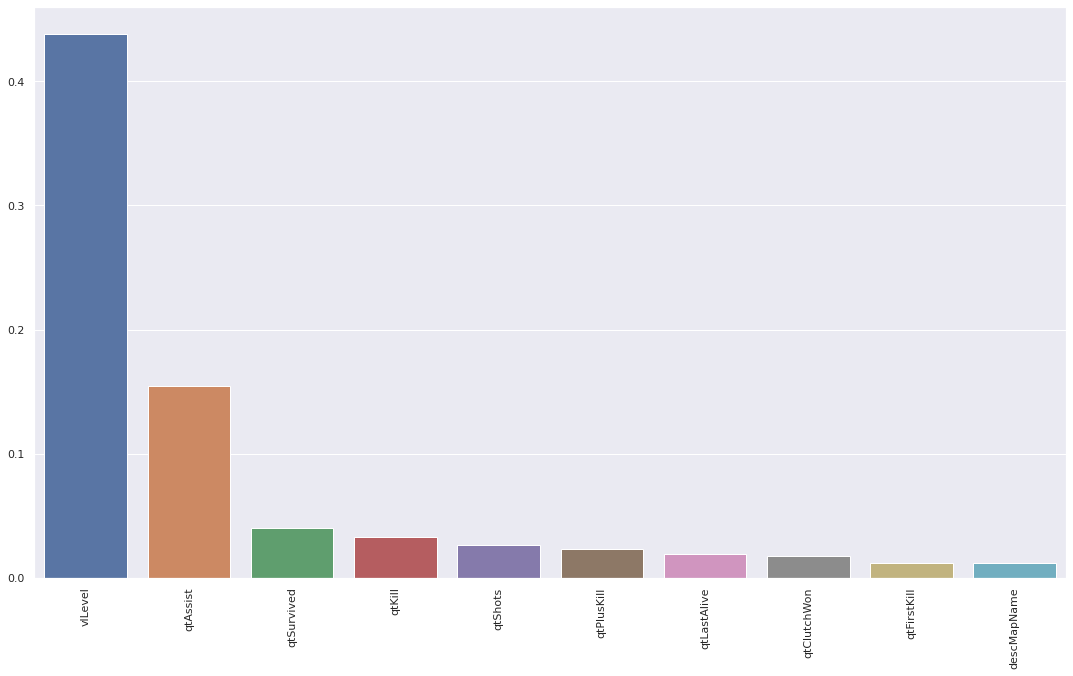

In [ ]:
xgb_feat = xgb_best.named_steps['xgbclassifier']
plt.figure(figsize=(18.5,10.5))
feature_names = cat_features + num_features
feat_imps = zip(feature_names, xgb_feat.feature_importances_ )
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x:x[1], reverse=True)))      
ax=sns.barplot(list(feats[:10]), list(imps[:10]))
ax.tick_params(axis='x', rotation=90)

Top 3 features:

1. XGBClassifier - vlLevel, qtAssist, qtSurvived
2. RandomForestClassifier - vlLevel, qtAssist, qtFirstKill
3. DecisionTreeClassifier - vlLevel, qtAssist, qtSurvived

Out of these, XGBClassifier had the best performance and therefore picking the top 3 features from XGBoost makes sense here. Moreover, we notice that the same 3 features were the top 3 with Decision Tree as well. Hence, since 2 different classifiers are listing the same 3 features as the top features, then these features would be the most informative and it makes sense to choose them.

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [ ]:
print(params)

{'max_depth': [7, 10], 'min_child_weight': [3, 6], 'n_estimators': [100, 200]}


In [ ]:
# All 7 of the top features are numerical features so we can apply StandardScaler to them.

top_features = ['vlLevel', 'qtAssist', 'qtSurvived', 'qtKill', 'qtShots', 'qtPlusKill', 'qtLastAlive']
x_dev = players_x_dev[['vlLevel', 'qtAssist', 'qtSurvived', 'qtKill', 'qtShots', 'qtPlusKill', 'qtLastAlive']]
x_test = players_x_test[['vlLevel', 'qtAssist', 'qtSurvived', 'qtKill', 'qtShots', 'qtPlusKill', 'qtLastAlive']]

preprocess_new = make_column_transformer((StandardScaler(), top_features), remainder='passthrough')

start = time.time()
grid_new = GridSearchCV(XGBClassifier(warm_start=True), param_grid=params, cv=5)
pipe_new = make_pipeline(preprocess_new, grid_new)
pipe_new.fit(x_dev, players_y_dev)
end = time.time()

print('Total Time (XGBClassifier) with top-7 Features = ', (end - start))
print('Best Hyperparameter values = ', grid.best_params_)

Total Time (XGBClassifier) with top-7 Features =  729.9999041557312
Best Hyperparameter values =  {'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 100}


In [ ]:
xgb_best_new = make_pipeline(preprocess_new, XGBClassifier(max_depth=7, min_child_weight=6, n_estimators=100, warm_start=True))
xgb_best_new.fit(x_dev, players_y_dev)
print('Performance on Test data with top-7 Features = ', xgb_best_new.score(x_test, players_y_test))

Performance on Test data with top-7 Features =  0.7532784882300236


The performance of XGBClassifier goes down with top-7 features (from 0.8021 to 0.7532). This happens because beyond the top-3 features have less importance and reduce the importance of the top-3 features. The extra 4 features may be adding some noise to the data causing the performance drop.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
prob = xgb_best.predict_proba(players_x_test)
# print(prob)
prob = prob [:, 1]
# print(prob)
print("Brier Score Loss = ", brier_score_loss(players_y_test, prob))

Brier Score Loss =  0.12833094492218536


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

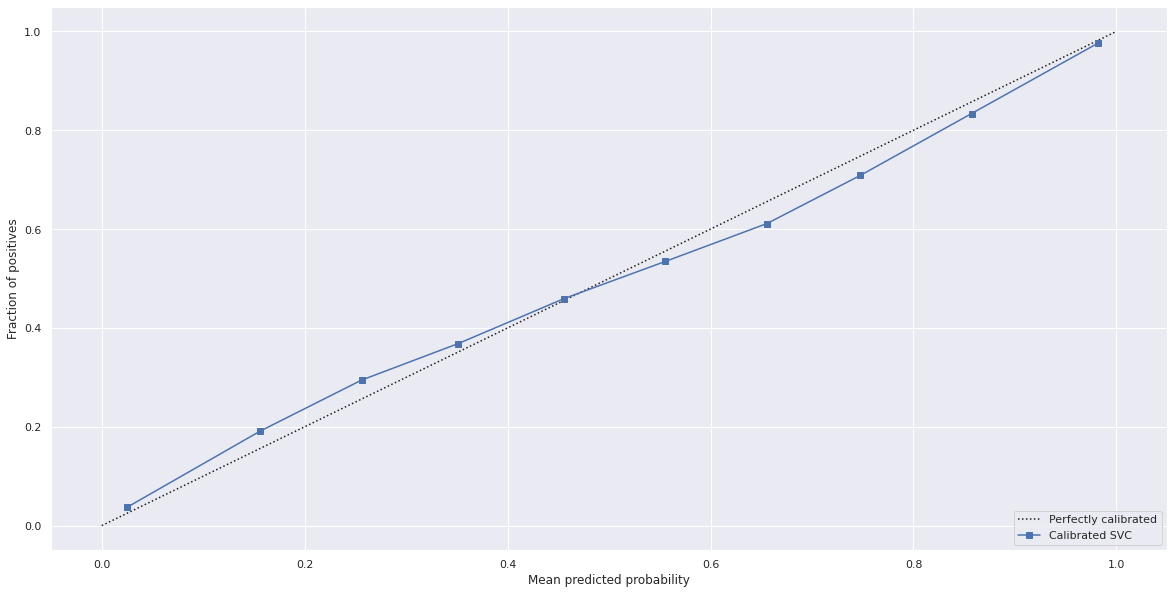

In [ ]:
isotonic = CalibratedClassifierCV(xgb_best, method='isotonic', cv='prefit')
isotonic.fit(players_x_dev, players_y_dev)
CalibrationDisplay.from_estimator(isotonic, players_x_test, players_y_test, name='Calibrated SVC', n_bins=10)

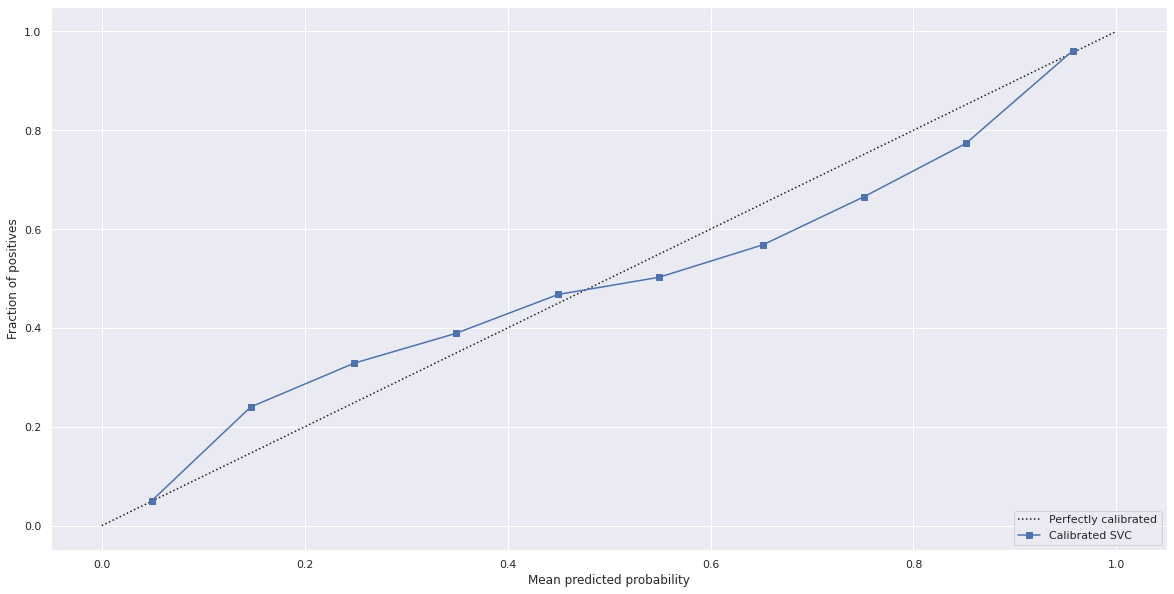

In [ ]:
platt = CalibratedClassifierCV(xgb_best, method='sigmoid', cv='prefit')
platt.fit(players_x_dev, players_y_dev)
CalibrationDisplay.from_estimator(platt, players_x_test, players_y_test, name='Calibrated SVC', n_bins=10)

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [ ]:
prob_isotonic = isotonic.predict_proba(players_x_test)
prob_platt = platt.predict_proba(players_x_test)

prob_isotonic = prob_isotonic[:, 1]
prob_platt = prob_platt[:, 1]

print('Brier Score Loss with Isotonic Regression = ', brier_score_loss(players_y_test, prob_isotonic))
print('Brier Score Loss with Platt Scaling = ', brier_score_loss(players_y_test, prob_platt))

Brier Score Loss with Isotonic Regression =  0.12886436801373571
Brier Score Loss with Platt Scaling =  0.13144016357710755


No, after applying the calibration, there has been a slight decline in predicting the probability by the model as we see from the values of Brier Loss:

```
With XGB                    = 0.12833
With Isotonic Regression    = 0.12886
With Platt Scaling          = 0.13144
```

So, we notice that there is a slight decrease, however, Isotonic Regression performs better than Platt Scaling and is very close to the value returned by XGB.